<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/03_CNNs_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**read this out first: [article](https://medium.com/@draj0718/convolutional-neural-networks-cnn-architectures-explained-716fb197b243)**

###What we're going to cover
Specifically, we're going to go through the follow with TensorFlow:

* Getting a dataset to work with
* Architecture of a convolutional neural network
* A quick end-to-end example (what we're working towards)
* Steps in modelling for binary image classification with CNNs
  * Becoming one with the data
  * Preparing data for modelling
  * Creating a CNN model (starting with a baseline)
  * Fitting a model (getting it to find patterns in our data)
  * Evaluating a model
  * Improving a model
  * Making a prediction with a trained model
* Steps in modelling for multi-class image classification with CNNs
* Same as above (but this time with a different dataset)


#### Getting the data
[Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) <br>
**About dataset:** this is a data set of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images.

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2025-01-01 10:54:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 173.194.217.207, 108.177.11.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   132MB/s    in 0.8s    

2025-01-01 10:54:02 (132 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

**dataset looks like:**
* pizza_steak
  * train
    * pizza
    * steak
  * test
    * pizza
    * steak

**! -> prefix for shell commands in colab**

In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train

pizza  steak


In [6]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

**this dataset is a subset of Food-101 with only 2 food categories - pizza and steak**

In [12]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [30]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train
# os.listdir("pizza_steak/train/pizza")

['3398309.jpg',
 '105910.jpg',
 '1512514.jpg',
 '3314176.jpg',
 '829229.jpg',
 '835833.jpg',
 '1839077.jpg',
 '877881.jpg',
 '545561.jpg',
 '464388.jpg',
 '1040878.jpg',
 '1269960.jpg',
 '1757288.jpg',
 '3312584.jpg',
 '352051.jpg',
 '93961.jpg',
 '2831983.jpg',
 '976382.jpg',
 '568995.jpg',
 '3484590.jpg',
 '3384856.jpg',
 '3082443.jpg',
 '3821701.jpg',
 '175626.jpg',
 '2674351.jpg',
 '768276.jpg',
 '168879.jpg',
 '369017.jpg',
 '349946.jpg',
 '2534774.jpg',
 '1906287.jpg',
 '52934.jpg',
 '3214153.jpg',
 '3427699.jpg',
 '131561.jpg',
 '3597955.jpg',
 '1054420.jpg',
 '799874.jpg',
 '394049.jpg',
 '2443498.jpg',
 '320570.jpg',
 '3512070.jpg',
 '1026922.jpg',
 '61822.jpg',
 '985164.jpg',
 '2557340.jpg',
 '2428085.jpg',
 '2529205.jpg',
 '517902.jpg',
 '527199.jpg',
 '134462.jpg',
 '1008104.jpg',
 '2187466.jpg',
 '1617418.jpg',
 '2757327.jpg',
 '2412237.jpg',
 '898119.jpg',
 '3193599.jpg',
 '2005870.jpg',
 '77677.jpg',
 '626170.jpg',
 '312479.jpg',
 '2148129.jpg',
 '401979.jpg',
 '724445.j

In [14]:
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))

num_pizza_images_test

250

In [15]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


**lets visualize some images**

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_img = random.sample(os.listdir(target_folder), 1) # dir, number of image to choose at random
    img = mpimg.imread(target_folder + '/' + random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    # plt.show()
    plt.axis('off');

    print(f"Image dimensions: {img.shape}")
    return img

Image dimensions: (512, 512, 3)


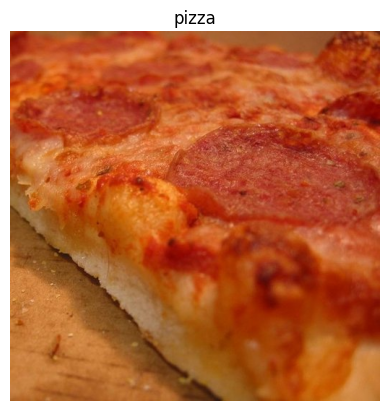

In [27]:
img = view_random_image(target_dir = 'pizza_steak/train/', target_class = 'pizza')

In [37]:
def view_shapes(target_dir, target_class):
    target_folder = target_dir + target_class
    image_dimensions = {(512, 512, 3)} #set
    for img_name in os.listdir(target_folder):
        image_path = target_folder + '/' + img_name
        image = plt.imread(image_path)
        image_dimensions.add(image.shape)
        # print(f"Image dimensions: {image.shape}")

    for dim in image_dimensions: #distinct dimensions
        print(f"dimensions of images in {target_folder} are {dim}")


view_shapes(target_dir='pizza_steak/test/', target_class = 'pizza')

dimensions of images in pizza_steak/test/pizza are (511, 512, 3)
dimensions of images in pizza_steak/test/pizza are (342, 512, 3)
dimensions of images in pizza_steak/test/pizza are (512, 443, 3)
dimensions of images in pizza_steak/test/pizza are (383, 512, 3)
dimensions of images in pizza_steak/test/pizza are (512, 306, 3)
dimensions of images in pizza_steak/test/pizza are (385, 512, 3)
dimensions of images in pizza_steak/test/pizza are (512, 383, 3)
dimensions of images in pizza_steak/test/pizza are (344, 512, 3)
dimensions of images in pizza_steak/test/pizza are (406, 512, 3)
dimensions of images in pizza_steak/test/pizza are (469, 512, 3)
dimensions of images in pizza_steak/test/pizza are (382, 512, 3)
dimensions of images in pizza_steak/test/pizza are (333, 512, 3)
dimensions of images in pizza_steak/test/pizza are (512, 341, 3)
dimensions of images in pizza_steak/test/pizza are (391, 512, 3)
dimensions of images in pizza_steak/test/pizza are (341, 512, 3)
dimensions of images in p

**check this out: [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/)**

#### Data Augmentation:
> **creating 500 new images using data augmentation, 250 of each category**



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import DirectoryIterator

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_dir = 'pizza_steak/train/'

pizza_images_train = [f for f in os.listdir(train_dir+'pizza')]
steak_images_train = [f for f in os.listdir(train_dir + 'steak')]

random_images_pizza = random.sample(pizza_images_train, 250)
random_images_steak = random.sample(steak_images_train, 250)


augmented_dir = 'pizza_steak/train/'

for img_file in random_images_pizza:
    img_path = os.path.join(train_dir, img_file)

    img = load_img(img_path, target_size=(224, 224)) #converting all images to 224 x 224 x 3
    img_array = img_to_array(img)
    #Before: The img_array has the shape (224, 224, 3) (height, width, depth/channels). After np.expand_dims(img_array, axis=0): The shape of img_array becomes (1, 224, 224, 3). The added dimension is the batch dimension.
